# Regresión Logística para predicciones bancarias

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
data = pd.read_csv('../datasets/bank/bank.csv', sep = ";")

In [39]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [40]:
data.shape

(4119, 21)

In [41]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [42]:
data['y'] = (data['y'] == 'yes').astype(int)

In [43]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [44]:
data['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [45]:
data['education'] = np.where(data['education'] == 'basic.4y', 'Basic', data['education'])
data['education'] = np.where(data['education'] == 'basic.6y', 'Basic', data['education'])
data['education'] = np.where(data['education'] == 'basic.9y', 'Basic', data['education'])

data['education'] = np.where(data['education'] == 'high.school', 'High School', data['education'])
data['education'] = np.where(data['education'] == 'professional.course', 'Professional Course', data['education'])
data['education'] = np.where(data['education'] == 'university.degree', 'University Degree', data['education'])

data['education'] = np.where(data['education'] == 'illiterate', 'Illiterate', data['education'])
data['education'] = np.where(data['education'] == 'unknown', 'Unknown', data['education'])

In [46]:
data['education'].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

In [47]:
data['y'].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [48]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [49]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


Text(0,0.5,'Frecuencia de compra del producto')

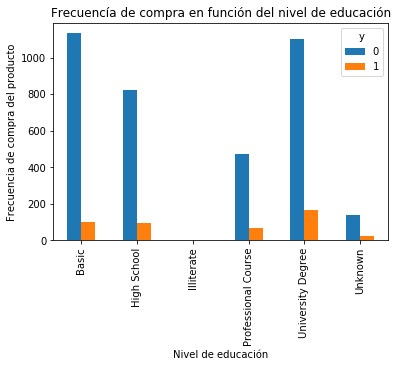

In [50]:
%matplotlib inline

pd.crosstab(data.education, data.y).plot(kind = 'bar')

plt.title('Frecuencía de compra en función del nivel de educación')
plt.xlabel('Nivel de educación')
plt.ylabel('Frecuencia de compra del producto')

Text(0,0.5,'Proporción de clientes')

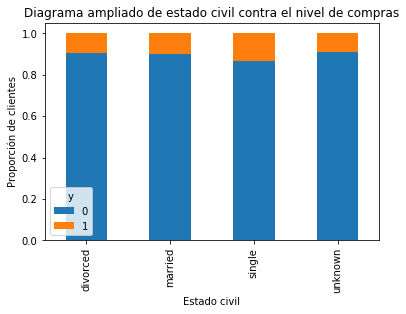

In [51]:
table = pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)

plt.title('Diagrama ampliado de estado civil contra el nivel de compras')
plt.xlabel('Estado civil')
plt.ylabel('Proporción de clientes')

Text(0,0.5,'Frecuencia de compra del producto')

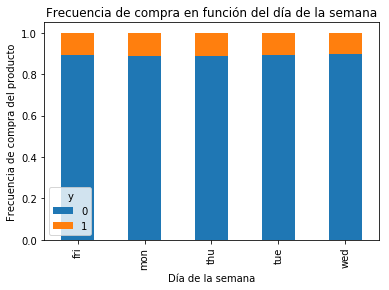

In [52]:
%matplotlib inline

table = pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)

plt.title('Frecuencia de compra en función del día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Frecuencia de compra del producto')

Text(0,0.5,'Frecuencia de compra del producto')

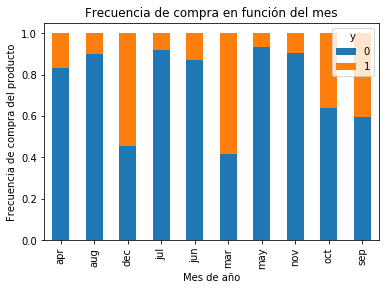

In [53]:
%matplotlib inline

table = pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)

plt.title('Frecuencia de compra en función del mes')
plt.xlabel('Mes de año')
plt.ylabel('Frecuencia de compra del producto')

Text(0,0.5,'Frencuencia de compra del producto')

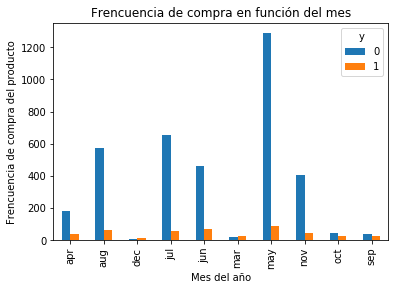

In [54]:
%matplotlib inline

table.plot(kind = 'bar', stacked = False)

plt.title('Frencuencia de compra en función del mes')
plt.xlabel('Mes del año')
plt.ylabel('Frencuencia de compra del producto')

Text(0,0.5,'Cliente')

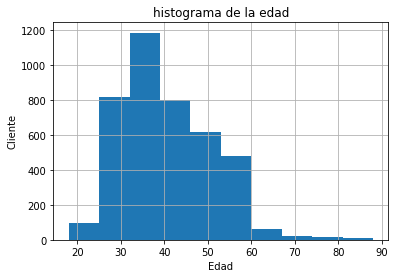

In [55]:
%matplotlib inline

data.age.hist()

plt.title('histograma de la edad')
plt.xlabel('Edad')
plt.ylabel('Cliente')

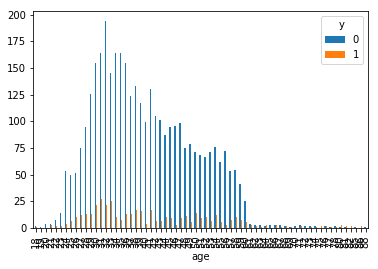

In [56]:
pd.crosstab(data.age, data.y).plot(kind = 'bar')

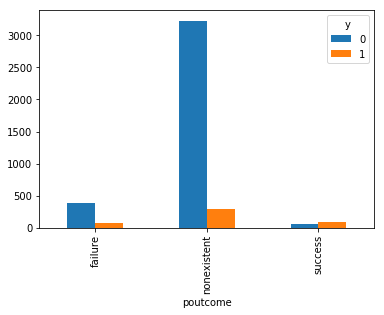

In [57]:
pd.crosstab(data.poutcome, data.y).plot(kind = 'bar')

### Conversión de variables categóricas a dummies

In [58]:
categories = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

for category in categories:
    cat_list = 'cat' + '_'+ category
    cat_dummies = pd.get_dummies(data[category], prefix = cat_list)
    data_new = data.join(cat_dummies)
    data = data_new

In [60]:
data_vars = data.columns.values.tolist()

In [61]:
to_keep = [v for v in data_vars if v not in categories]

In [63]:
bank_data = data[to_keep]
bank_data.columns

Index(['age', 'default', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'cat_job_admin.', 'cat_job_blue-collar',
       'cat_job_entrepreneur', 'cat_job_housemaid', 'cat_job_management',
       'cat_job_retired', 'cat_job_self-employed', 'cat_job_services',
       'cat_job_student', 'cat_job_technician', 'cat_job_unemployed',
       'cat_job_unknown', 'cat_marital_divorced', 'cat_marital_married',
       'cat_marital_single', 'cat_marital_unknown', 'cat_education_Basic',
       'cat_education_High School', 'cat_education_Illiterate',
       'cat_education_Professional Course', 'cat_education_University Degree',
       'cat_education_Unknown', 'cat_housing_no', 'cat_housing_unknown',
       'cat_housing_yes', 'cat_loan_no', 'cat_loan_unknown', 'cat_loan_yes',
       'cat_contact_cellular', 'cat_contact_telephone', 'cat_month_apr',
       'cat_month_aug', 'cat_month_dec', 'cat_month_jul', 'cat

In [64]:
bank_data_vars = bank_data.columns.values.tolist()

Y = ['y']

X = [v for v in bank_data_vars if v not in Y]

### Selección de rasgos para el modelo